## Problem 1

In [22]:
import sympy as sp
from sympy import sin, cos, pi
import numpy as np

theta0, theta1, theta2, theta3, theta4, theta5 = sp.symbols('theta0 theta1 theta2 theta3 theta4 theta5')
d0, d1, d2, d3, d4, d5 = sp.symbols('d0 d1 d2 d3 d4 d5')
a0, a1, a2, a3, a4, a5 = sp.symbols('a0 a1 a2 a3 a4 a5')
alpha0, alpha1, alpha2, alpha3, alpha4, alpha5 = sp.symbols('alpha0 alpha1 alpha2 alpha3 alpha4 alpha5')

theta_0, d_0, a_0, alpha_0 = theta0, 50e-3, 0, pi/2
theta_1, d_1, a_1, alpha_1 = theta1 + pi/2, 0, 93e-3, 0
theta_2, d_2, a_2, alpha_2 = theta2, 0, 93e-3, 0
theta_3, d_3, a_3, alpha_3 = theta3, 0, 0, 0

theta = [theta_0, theta_1, theta_2, theta_3]
d = [d_0, d_1, d_2, d_3]
a = [a_0, a_1, a_2, a_3]
alpha = [alpha_0, alpha_1, alpha_2, alpha_3]

# Rød=x, Grøn=y, Blå=z
joint_matrix = sp.Matrix([
                 [0, 0, 0, 0],
                 [theta_0, d_0, a_0, alpha_0],
                 [theta_1, d_1, a_1, alpha_1],
                 [theta_2, d_2, a_2, alpha_2],
                 [theta_3, d_3, a_3, alpha_3]])

display(joint_matrix)


Matrix([
[            0,    0,     0,    0],
[       theta0, 0.05,     0, pi/2],
[theta1 + pi/2,    0, 0.093,    0],
[       theta2,    0, 0.093,    0],
[       theta3,    0,     0,    0]])

In [23]:
T = lambda theta, d, a, alpha: sp.Matrix([[cos(theta), -sin(theta)*cos(alpha), sin(theta)*sin(alpha), a*cos(theta)],
                                          [sin(theta), cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
                                          [0, sin(alpha), cos(alpha), d],
                                          [0, 0, 0, 1]])
Translation = lambda x, y, z: sp.Matrix([[1, 0, 0, x],
                                         [0, 1, 0, y],
                                         [0, 0, 1, z],
                                         [0, 0, 0, 1]])
A = sp.Matrix([[1, 0, 0, 0],
                                         [0, 1, 0, 0],
                                         [0, 0, 1, 0],
                                         [0, 0, 0, 1]])
T_arr = [A]
for (th, di, ai, al) in zip(theta, d, a, alpha):
     T_arr.append(T_arr[-1]*T(th, di, ai, al))

pointer = [50e-3, 0, 0]
camera = [35e-3, 45e-3, 0]

T_4 = T_arr[4] * Translation(*pointer)
T_5 = T_arr[4] * Translation(*camera)

T_arr.append(T_4)
display(T_4)

Matrix([
[(sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta3), (sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - (-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*sin(theta3),  sin(theta0), 0.05*(sin(theta1)*sin(theta2)*cos(theta0) - cos(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + 0.05*(-sin(theta1)*cos(theta0)*cos(theta2) - sin(theta2)*cos(theta0)*cos(theta1))*cos(theta3) - 0.093*sin(theta1)*cos(theta0)*cos(theta2) - 0.093*sin(theta1)*cos(theta0) - 0.093*sin(theta2)*cos(theta0)*cos(theta1)],
[(sin(theta0)*sin(theta1)*sin(theta2) - sin(theta0)*cos(theta1)*cos(theta2))*sin(theta3) + (-sin(theta0)*sin(theta1)*cos(theta2) - sin(theta0)*sin(theta2)*cos(theta1))*cos(theta3), (sin(theta0)*sin(theta1)*sin(theta2) - sin(theta0)*cos(theta1)*cos(theta2))*cos(theta3) - (-sin(theta0)*sin(theta1)*cos(thet

## Problem 2

In [24]:
def get_angles(T, pos, initial_guess):
    x_04 = T[0:3,0]
    o_04 = T[0:3,3]
    eq1 = sp.Eq(o_04[0], pos[0])
    eq2 = sp.Eq(o_04[1], pos[1])
    eq3 = sp.Eq(o_04[2], pos[2])
    eq4 = sp.Eq(x_04[2], 0)
    
    # Solve numerically
    solution = sp.nsolve((eq1, eq2, eq3, eq4), [theta0, theta1, theta2, theta3], initial_guess, tol=1e-6)
    #convert to degrees
    solution = [s for s in solution]
    
    return solution

# Example usage
initial_guess = [1, 1, 1, 1]  # Provide an initial guess for the angles
pos = sp.Matrix([150e-3, 0, 120e-3])  # Example position
angles = get_angles(T_4, pos, initial_guess)

print(angles)
print("Position")
display(T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1]))

[3.14159265091813, -12.4612367194736, 14.2762437581543, -6.52739601906535]
Position


Matrix([
[    0.149999997930147],
[-4.00749979384566e-10],
[     0.11999998299887],
[                    1]])

## Problem 3

In [25]:
from mpl_toolkits.mplot3d import Axes3D

pc = sp.Matrix([150e-3, 0, 120e-3])
R = 32e-3
N_circle = 37
angles_in_circ = np.linspace(0, 2*np.pi, N_circle)
p_circ = [pc + R*sp.Matrix([0, cos(phi), sin(phi)]) for phi in angles_in_circ] 
index_to_angle = {i: a for i, a in enumerate(angles_in_circ)}

angles_circ = []
initial_guess = [0.210182586676604, -0.140623923276670, -1.66990262183703, 0.239730218318808]
for p in p_circ:
    angles_circ_temp = get_angles(T_4, p, initial_guess)
    initial_guess = angles_circ_temp
    angles_circ_temp = [(angle + np.pi) % (2 * np.pi) - np.pi for angle in angles_circ_temp]
    angles_circ.append(angles_circ_temp)

print(angles_circ)

[[0.210182586662170, -0.140623923147677, -1.66990262059900, 0.239730216951784], [0.207080611685806, -0.127064032792593, -1.62421217229386, 0.180479878291553], [0.197845269578283, -0.115206561582811, -1.57890201613219, 0.123312250920104], [0.182692001720791, -0.105193450422804, -1.53540192608275, 0.0697990497106598], [0.161990775810560, -0.0970466772609604, -1.49518470410813, 0.0214350545741979], [0.136277981433745, -0.0906946982451906, -1.45971791564238, -0.0203837129073228], [0.106264771023411, -0.0860035536032218, -1.43039538111446, -0.0543973920772181], [0.0728351470144535, -0.0828121423008565, -1.40845088429883, -0.0795333001952074], [0.0370279568084562, -0.0809693179513271, -1.39486203490816, -0.0949649739354101], [-2.34836474710676e-8, -0.0803679449264085, -1.39025963369409, -0.100168748174395], [-0.0370280008095420, -0.0809693310199737, -1.39486198239856, -0.0949650133763615], [-0.0728351820727706, -0.0828121631219862, -1.40845078767865, -0.0795333759942576], [-0.106264791662373

**Illustration of inverse kinematics**

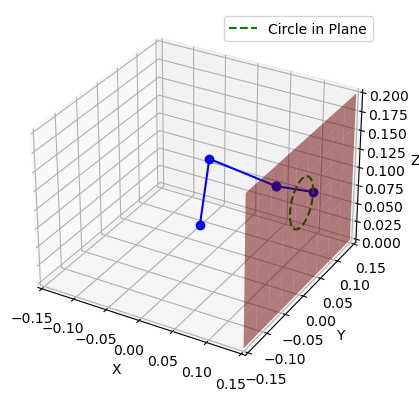

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

def plot_robot_from_angles(angles):
    p1 = T_arr[1].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p2 = T_arr[2].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p3 = T_arr[3].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p4 = T_arr[4].subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])
    p5 = T_4.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})*sp.Matrix([0, 0, 0, 1])

    import matplotlib.pyplot as plt    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract points
    points = [p1, p2, p3, p4, p5]
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    z_vals = [p[2] for p in points]

    # Plot points and lines
    ax.plot(x_vals, y_vals, z_vals, marker='o', linestyle='-', color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-0.15, 0.15])
    ax.set_ylim([-0.15, 0.15])
    ax.set_zlim([0, 0.2])
    # Plot a plane with x=0.15
    xx, yy = np.meshgrid(np.linspace(-0.15, 0.15, 10), np.linspace(0, 0.2, 10))
    zz = np.zeros_like(xx) + 0.15
    ax.plot_surface(zz, xx, yy, color='r', alpha=0.5)
    # Plot the circle in the plane
    x_vals = [p[0] for p in p_circ]
    y_vals = [p[1] for p in p_circ]
    z_vals = [p[2] for p in p_circ]
    ax.plot(x_vals, y_vals, z_vals, 'g--', label='Circle in Plane')
    ax.legend()
    plt.show()

    
plot_robot_from_angles(angles_circ[0])



## Problem 4

In [27]:
Jac = sp.zeros(6, 4)
o_n = T_arr[-1][:3, 3]
for i in range(1, T_arr.__len__()-1):
    z_i1 = T_arr[i-1][:3, 2]
    o_i1 = T_arr[i-1][:3, 3]
    Jac[:3, i-1] = z_i1.cross(o_n - o_i1)
    Jac[3:, i-1] = z_i1

In [28]:
# Define the function to round and set small values to 0
def round_and_zero(matrix, decimals, threshold=1e-10):
    def process_value(x):
        rounded_value = round(x, decimals)
        return rounded_value if abs(rounded_value) >= threshold else 0
    return matrix.applyfunc(process_value)

# Updated print_jac function
def print_jac(angles):
    jacobian = Jac.subs({theta0: angles[0], theta1: angles[1], theta2: angles[2], theta3: angles[3]})
    processed_jacobian = round_and_zero(jacobian, 4)
    display(processed_jacobian)

print("Jacobian for phi = 0")
print_jac(angles_circ[0])
print("Jacobian for phi = pi/2")
print_jac(angles_circ[9])
print("Jacobian for phi = pi")
print_jac(angles_circ[18])
print("Jacobian for phi = 3*pi/2")
print_jac(angles_circ[27])

Jacobian for phi = 0


Matrix([
[-0.032, -0.0685, 0.0216,      0],
[  0.15, -0.0146, 0.0046,      0],
[     0,  0.1534, 0.1403,   0.05],
[     0,  0.2086, 0.2086, 0.2086],
[     0,  -0.978, -0.978, -0.978],
[     1,       0,      0,      0]])

Jacobian for phi = pi/2


Matrix([
[   0, -0.102, -0.0093,    0],
[0.15,      0,       0,    0],
[   0,   0.15,  0.1425, 0.05],
[   0,      0,       0,    0],
[   0,   -1.0,    -1.0, -1.0],
[   1,      0,       0,    0]])

Jacobian for phi = pi


Matrix([
[0.032, -0.0685,  0.0216,       0],
[ 0.15,  0.0146, -0.0046,       0],
[    0,  0.1534,  0.1403,    0.05],
[    0, -0.2086, -0.2086, -0.2086],
[    0,  -0.978,  -0.978,  -0.978],
[    1,       0,       0,       0]])

Jacobian for phi = 3*pi/2


Matrix([
[   0, -0.038, 0.0521,    0],
[0.15,      0,      0,    0],
[   0,   0.15,  0.127, 0.05],
[   0,      0,      0,    0],
[   0,   -1.0,   -1.0, -1.0],
[   1,      0,      0,    0]])

## Problem 5

In [29]:
angles_pi_2 = angles_circ[9]
substitutions = {theta0: angles_pi_2[0], theta1: angles_pi_2[1], theta2: angles_pi_2[2], theta3: angles_pi_2[3]}
jacobian_0_4 = Jac.subs(substitutions)

q1, q2, q3, q4 = sp.symbols('q1 q2 q3 q4')
q_arr = sp.Matrix([q1, q2, q3, q4])

jac_arr = jacobian_0_4*q_arr
wx, wy, wz = jac_arr[3], jac_arr[4], jac_arr[5]
skew = sp.Matrix([[0, -wz, wy], [wz, 0, -wx], [-wy, wx, 0]])
T_4_dot = skew*T_arr[4][:3, :3]

l1 = sp.Eq(jac_arr[0], 0)
l2 = sp.Eq(jac_arr[1], -3)
l3 = sp.Eq(jac_arr[2], 0)
l4 = sp.Eq(T_4_dot[2, 0].subs(substitutions), 0)

# Initial guess for the variables
initial_guess = [1, 1, 1, 1]

# Solve numerically
solution = sp.nsolve((l1, l2, l3, l4), (q1, q2, q3, q4), initial_guess)
display(solution)


Matrix([
[   -20.0000006958637],
[-7.66192277892153e-7],
[ 8.28013199521246e-7],
[-6.18209216290925e-8]])

In [30]:
# states
angles = [0, 9, 18, 27, 0]

states = sp.Matrix([angles_circ[angle] for angle in angles])

Jacobi_at_angle = lambda N_angle: Jac.subs({theta0: angles_circ[N_angle][0], theta1: angles_circ[N_angle][1], theta2: angles_circ[N_angle][2], theta3: angles_circ[N_angle][3]})[:3, :4]
jacobi_list = [Jacobi_at_angle(i) for i in angles]

t = sp.symbols('t')

# defining the polynomial constants as variables
def create_symbols(prefix):
    return sp.Matrix([[sp.symbols(f'{prefix}{i}{j}') for j in range(5, -1, -1)] for i in range(1, 5)])

var_names = [f'S{i}' for i in range(len(angles)-1)]
var_arr = [create_symbols(var_name) for var_name in var_names]


# defining polynomial constants for the segments:
t_vec = sp.Matrix([t**i for i in range(5, -1, -1)])
t_vec_diff = t_vec.diff(t)
t_vec_diffdiff = t_vec.diff(t,t)

# velocity boundaries - using jacobian
v_val = 0.027
v = [np.array([0,-np.sin(index_to_angle[i]), np.cos(index_to_angle[i])])*v_val for i in angles[1:len(angles)-1]]
v = sp.Matrix([[0,0,0], *v, [0,0,0]])

# since the arm is overconstrained, we need to use the pseudoinverse:
pseudoinv_jacobian = lambda Jacobi: Jacobi.T * (Jacobi * Jacobi.T).inv()
pseudoinv_jacobian_list = [pseudoinv_jacobian(Jacobi) for Jacobi in jacobi_list]

eq_arr = []

for i, var in enumerate(var_arr):
    eq_arr.append(states[i,:].T - ( var * t_vec.subs(t, 0)) )
    eq_arr.append(states[i+1,:].T - ( var * t_vec.subs(t, 2)) )

    eq_arr.append((var * t_vec_diff.subs(t, 0)) - pseudoinv_jacobian_list[i] * v[i,:].T)
    eq_arr.append((var * t_vec_diff.subs(t, 2)) - pseudoinv_jacobian_list[i+1] * v[i+1,:].T)

    eq_arr.append(var * t_vec_diffdiff.subs(t, 0))
    eq_arr.append(var * t_vec_diffdiff.subs(t, 2))

# the eqs list has lists of equations inside, we need to flatten it
eqs = [eq for sublist in eq_arr for eq in sublist]

# Solve for the individual elements
sol = sp.solve(eqs, sp.flatten(var_arr))
sol_arr = [sp.Matrix([[sol[sp.symbols(f'{var_name}{i}{j}')] for j in range(5, -1, -1)] for i in range(1, 5)]) for var_name in var_names]


# printing the solution with 4 decimal places
for i, sol in enumerate(sol_arr):
    print(f"Solution for {var_names[i]}:")
    display(sol.evalf(4))

# make expressions for the polynomials
q_arr = [sol* t_vec for sol in sol_arr]
for i, q in enumerate(q_arr):
    print(f"Polynomial for {var_names[i]}:")
    display(q.evalf(4))

Solution for S0:


Matrix([
[-0.005659,  0.03955, -0.08273, 0, 0,  0.2102],
[   0.0113, -0.05649,  0.07532, 0, 0, -0.1406],
[  0.05243,  -0.2622,   0.3496, 0, 0,   -1.67],
[ -0.06373,   0.3187,  -0.4249, 0, 0,  0.2397]])

Solution for S1:


Matrix([
[-0.005659, 0.01705, 0.007272, 0,     -0.18, -2.348e-8],
[-0.003442, 0.01983, -0.03342, 0, -6.782e-9,  -0.08037],
[ -0.02753,   0.146,  -0.2167, 0,  6.208e-9,     -1.39],
[  0.07099, -0.3525,   0.4636, 0,  2.649e-9,   -0.1002]])

Solution for S2:


Matrix([
[0.005659, -0.03955,  0.08273, 0, -2.108e-17, -0.2102],
[-0.01258,   0.0603, -0.07341, 0,    -0.0419, -0.1406],
[-0.02125,  0.09793,  -0.1084, 0,    -0.1328,   -1.67],
[ 0.07384,  -0.3716,    0.502, 0,   -0.03869,  0.2397]])

Solution for S3:


Matrix([
[0.005659, -0.01705, -0.007272, 0,       0.18, 2.352e-8],
[ 0.02044,  -0.1022,    0.1363, 0,  -6.344e-9,  -0.2496],
[ 0.04615,  -0.2307,    0.3077, 0,   7.559e-9,   -1.916],
[-0.06659,   0.3329,   -0.4439, 0, -1.716e-10,   0.5949]])

Polynomial for S0:


Matrix([
[-0.005659*t**5 + 0.03955*t**4 - 0.08273*t**3 + 0.2102],
[   0.0113*t**5 - 0.05649*t**4 + 0.07532*t**3 - 0.1406],
[      0.05243*t**5 - 0.2622*t**4 + 0.3496*t**3 - 1.67],
[   -0.06373*t**5 + 0.3187*t**4 - 0.4249*t**3 + 0.2397]])

Polynomial for S1:


Matrix([
[  -0.005659*t**5 + 0.01705*t**4 + 0.007272*t**3 - 0.18*t - 2.348e-8],
[-0.003442*t**5 + 0.01983*t**4 - 0.03342*t**3 - 6.782e-9*t - 0.08037],
[       -0.02753*t**5 + 0.146*t**4 - 0.2167*t**3 + 6.208e-9*t - 1.39],
[     0.07099*t**5 - 0.3525*t**4 + 0.4636*t**3 + 2.649e-9*t - 0.1002]])

Polynomial for S2:


Matrix([
[0.005659*t**5 - 0.03955*t**4 + 0.08273*t**3 - 2.108e-17*t - 0.2102],
[    -0.01258*t**5 + 0.0603*t**4 - 0.07341*t**3 - 0.0419*t - 0.1406],
[      -0.02125*t**5 + 0.09793*t**4 - 0.1084*t**3 - 0.1328*t - 1.67],
[      0.07384*t**5 - 0.3716*t**4 + 0.502*t**3 - 0.03869*t + 0.2397]])

Polynomial for S3:


Matrix([
[0.005659*t**5 - 0.01705*t**4 - 0.007272*t**3 + 0.18*t + 2.352e-8],
[  0.02044*t**5 - 0.1022*t**4 + 0.1363*t**3 - 6.344e-9*t - 0.2496],
[   0.04615*t**5 - 0.2307*t**4 + 0.3077*t**3 + 7.559e-9*t - 1.916],
[-0.06659*t**5 + 0.3329*t**4 - 0.4439*t**3 - 1.716e-10*t + 0.5949]])

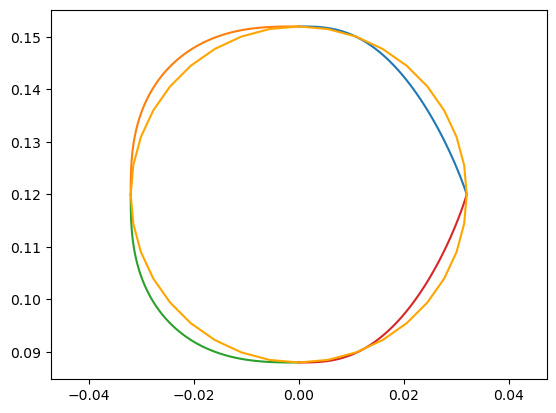

In [31]:
t_vals = np.linspace(0, 2, 100)

# transformation matrix for the end effector
point_from_segment = lambda q : np.array([np.array(T_4[1:3,3].subs({theta0: q[0], theta1: q[1], theta2: q[2], theta3: q[3]}).subs({t:t_val})).ravel() for t_val in t_vals])

segment_point_arr = [point_from_segment(q) for q in q_arr]

circ_y_vals = [p[1] for p in p_circ]
circ_z_vals = [p[2] for p in p_circ]

import matplotlib.pyplot as plt
plt.figure()
for segment_points in segment_point_arr:
    plt.plot(segment_points[:,0], segment_points[:,1])
plt.plot(circ_y_vals, circ_z_vals, color='orange')
plt.axis('equal')
plt.show()

